# Ejercicio 1

Implementar un auto codificador para las imágenes binarias de la lista [Mayus].
* Plantear una arquitectura de red para el codificador y decodificador que permitan representar
los datos de entrada que están en dos dimensiones.
* Estudien y describan las diferentes arquitecturas y parámetros que fueron aplicando para
permitir que la red converja adecuadamente.
* Realizar el gráfico en dos dimensiones que muestre los datos de entrada en el espacio latente.
* Mostrar cómo la red puede generar un nuevo caracter que no pertenece al conjunto de
entrenamiento.


In [ ]:
Mayus= [
   [0x0e, 0x11, 0x17, 0x15, 0x17, 0x10, 0x0f],   # 0x40, @
   [0x04, 0x0a, 0x11, 0x11, 0x1f, 0x11, 0x11],   # 0x41, A
   [0x1e, 0x11, 0x11, 0x1e, 0x11, 0x11, 0x1e],   # 0x42, B
   [0x0e, 0x11, 0x10, 0x10, 0x10, 0x11, 0x0e],   # 0x43, C
   [0x1e, 0x09, 0x09, 0x09, 0x09, 0x09, 0x1e],   # 0x44, D
   [0x1f, 0x10, 0x10, 0x1c, 0x10, 0x10, 0x1f],   # 0x45, E
   [0x1f, 0x10, 0x10, 0x1f, 0x10, 0x10, 0x10],   # 0x46, F
   [0x0e, 0x11, 0x10, 0x10, 0x13, 0x11, 0x0f],   # 0x37, G
   [0x11, 0x11, 0x11, 0x1f, 0x11, 0x11, 0x11],   # 0x48, H
   [0x0e, 0x04, 0x04, 0x04, 0x04, 0x04, 0x0e],   # 0x49, I
   [0x1f, 0x02, 0x02, 0x02, 0x02, 0x12, 0x0c],   # 0x4a, J
   [0x11, 0x12, 0x14, 0x18, 0x14, 0x12, 0x11],   # 0x4b, K
   [0x10, 0x10, 0x10, 0x10, 0x10, 0x10, 0x1f],   # 0x4c, L
   [0x11, 0x1b, 0x15, 0x11, 0x11, 0x11, 0x11],   # 0x4d, M
   [0x11, 0x11, 0x19, 0x15, 0x13, 0x11, 0x11],   # 0x4e, N
   [0x0e, 0x11, 0x11, 0x11, 0x11, 0x11, 0x0e],   # 0x4f, O
   [0x1e, 0x11, 0x11, 0x1e, 0x10, 0x10, 0x10],   # 0x50, P
   [0x0e, 0x11, 0x11, 0x11, 0x15, 0x12, 0x0d],   # 0x51, Q
   [0x1e, 0x11, 0x11, 0x1e, 0x14, 0x12, 0x11],   # 0x52, R
   [0x0e, 0x11, 0x10, 0x0e, 0x01, 0x11, 0x0e],   # 0x53, S
   [0x1f, 0x04, 0x04, 0x04, 0x04, 0x04, 0x04],   # 0x54, T
   [0x11, 0x11, 0x11, 0x11, 0x11, 0x11, 0x0e],   # 0x55, U
   [0x11, 0x11, 0x11, 0x11, 0x11, 0x0a, 0x04],   # 0x56, V
   [0x11, 0x11, 0x11, 0x15, 0x15, 0x1b, 0x11],   # 0x57, W
   [0x11, 0x11, 0x0a, 0x04, 0x0a, 0x11, 0x11],   # 0x58, X
   [0x11, 0x11, 0x0a, 0x04, 0x04, 0x04, 0x04],   # 0x59, Y
   [0x1f, 0x01, 0x02, 0x04, 0x08, 0x10, 0x1f],   # 0x5a, Z
   [0x0e, 0x08, 0x08, 0x08, 0x08, 0x08, 0x0e],   # 0x5b, [
   [0x10, 0x10, 0x08, 0x04, 0x02, 0x01, 0x01],   # 0x5c, \\
   [0x0e, 0x02, 0x02, 0x02, 0x02, 0x02, 0x0e],   # 0x5d, ]
   [0x04, 0x0a, 0x11, 0x00, 0x00, 0x00, 0x00],   # 0x5e, ^
   [0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x1f]   # 0x5f, _
    ]

In [ ]:
import numpy as np
# Pasar el conjunto de datos de hexadecimal a binario
# Luego transformar los datos de 7x5 a una fila si queremos
def convertir_a_binario_flatten(matriz):
    matriz_flatten = []  # Lista final con cada letra como una fila de 35 bits

    for letra in matriz:
        bin_letra = []  # Lista que contendrá los 35 bits de la letra

        for numero in letra:
            # Convertir el número hexadecimal a una cadena binaria de 5 bits
            fila_binaria = format(numero, '05b')

            # Recorrer cada carácter ('0' o '1') y convertirlo a entero
            for caracter in fila_binaria:
                if caracter == '0':
                    bit = 0
                else:
                    bit = 1

                # Agregar el bit a la fila de la letra
                bin_letra.append(bit)

        # Agregar la letra completa a la matriz final
        matriz_flatten.append(bin_letra)

    return matriz_flatten

entradas = np.array(convertir_a_binario_flatten(Mayus))
salidas_deseadas = entradas.copy()

In [ ]:
import keras
from keras.models import Model
from keras.layers import Dense, Input
import numpy as np

# Modelo del autoencoder
entrada = Input(shape=(35,))
x = Dense(16, activation='gelu')(entrada)  # Capa codificadora
latente = Dense(2, activation='linear', name='latente')(x) # Capa latente
x = Dense(16, activation='gelu')(latente)
salida = Dense(35, activation='sigmoid', name='salida')(x)  # Capa decodificadora

# Modelo autoencoder
autoencoder = Model(inputs=entrada, outputs=salida)

# Compilación del modelo
opt = keras.optimizers.Adam(learning_rate=0.05)
autoencoder.compile(loss='binary_crossentropy', optimizer=opt)

# Entrenamiento
historia = autoencoder.fit(entradas, salidas_deseadas, epochs=500)

# Predicciones
predicciones = autoencoder.predict(entradas)

# Mostrar original vs reconstruido
for i in range(len(entradas)):
    print(f"Letra {i}:")
    print("Original:    ", entradas[i])
    print("Reconstruida:", np.round(predicciones[i]))
    print()

pred_binarias = np.round(autoencoder.predict(entradas))
errores = np.sum(pred_binarias != entradas)
total = entradas.size
print(f"Bits mal reconstruidos: {errores}/{total} ({errores / total * 100:.2f}%)")

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6904
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6375
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5929
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5554
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.5428
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5288
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.5163
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4977
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4839
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4725
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4560
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4436
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4288
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4178
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4102
Epoch 16/500
1/1 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


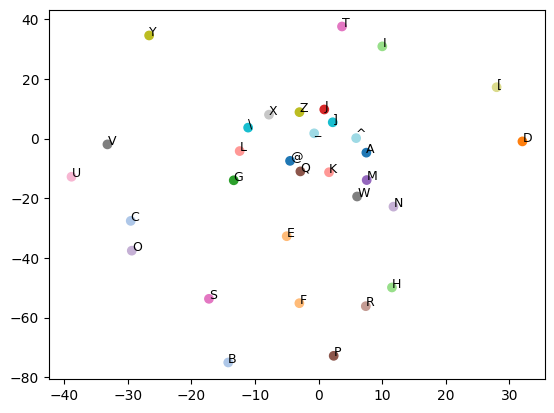

In [ ]:
import matplotlib.pyplot as plt

# Modelo para obtener coordenadas latentes
capa_latente = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('latente').output)
coordenadas_latentes = capa_latente.predict(entradas)

letras = ['@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
          'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
          'Z', '[', '\\', ']', '^', '_']  # una lista con las etiquetas

codigos = list(range(len(letras)))
plt.scatter(coordenadas_latentes[:, 0], coordenadas_latentes[:, 1], c=codigos, cmap='tab20')

for i, letra in enumerate(letras):
    plt.text(coordenadas_latentes[i, 0], coordenadas_latentes[i, 1], letra, fontsize=9)

#Letras con formas similares (como 'O', 'Q', 'C') tienden a agruparse en el espacio latente.
#Letras con formas muy distintas estarán más separadas.
#Si el autoencoder aprendió bien, se deberían formar grupos con significado visual.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Letra generada:
[[0. 1. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 1. 1. 1. 0.]]
[36.3329   6.40275]


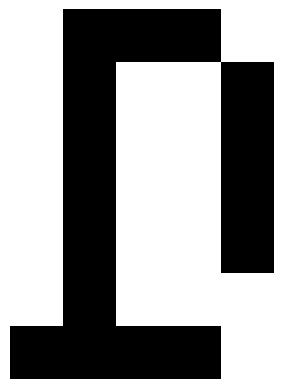

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
0


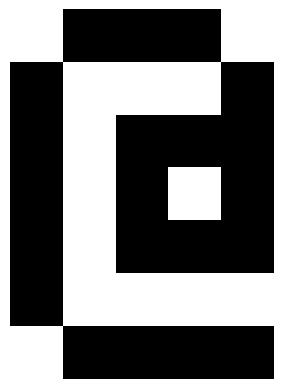

1


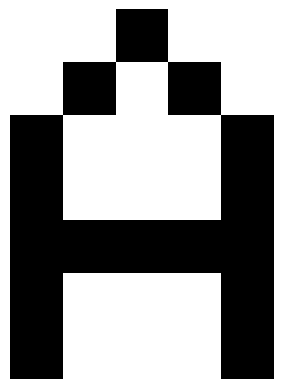

2


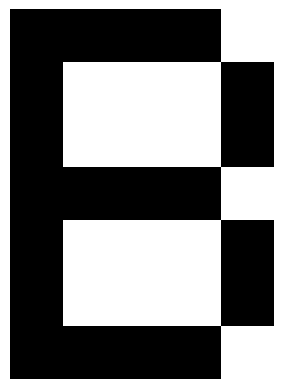

3


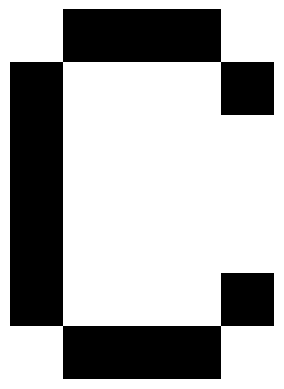

4


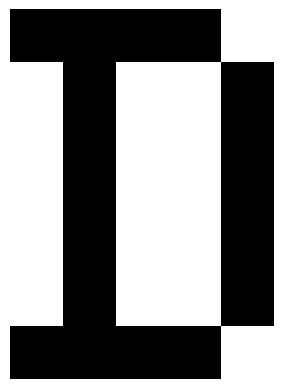

5


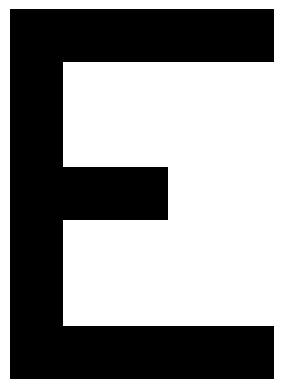

6


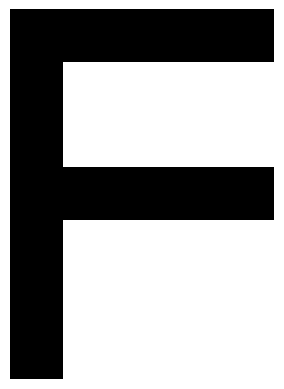

7


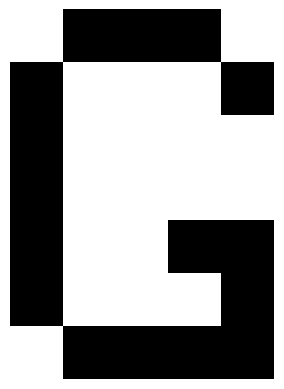

8


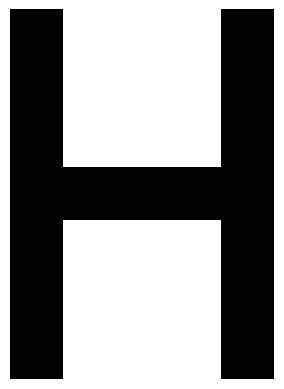

9


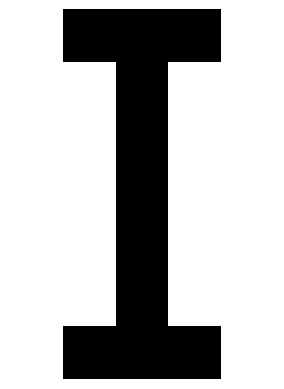

10


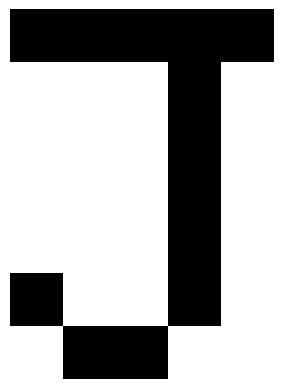

11


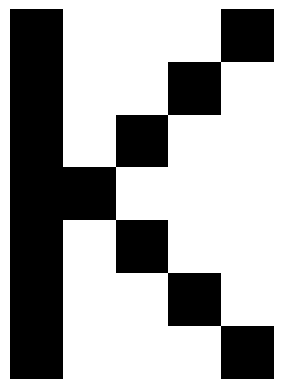

12


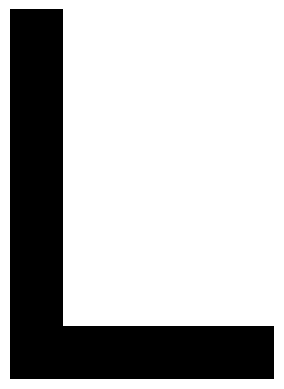

13


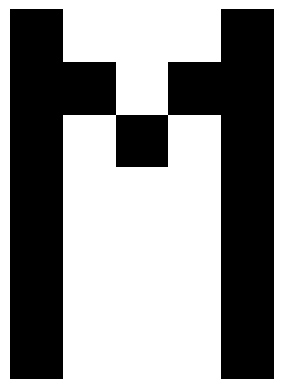

14


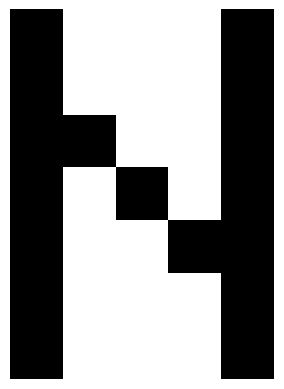

15


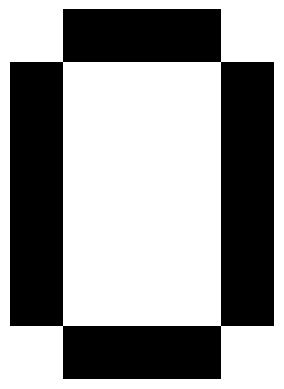

16


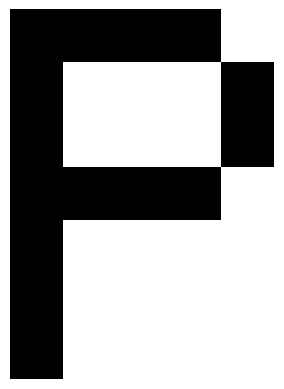

17


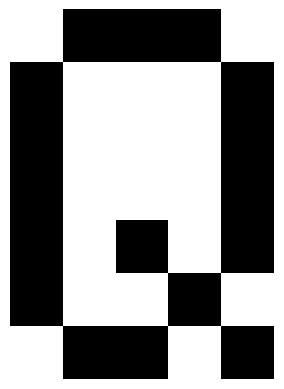

18


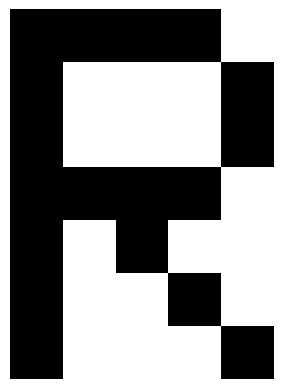

19


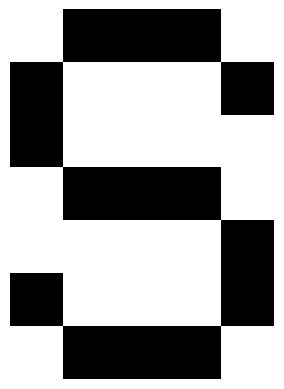

20


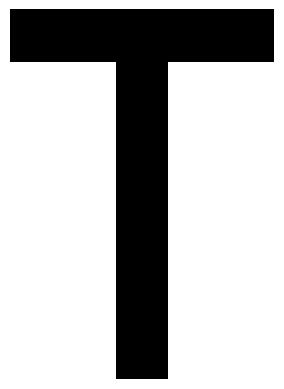

21


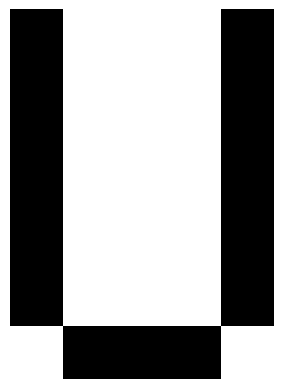

22


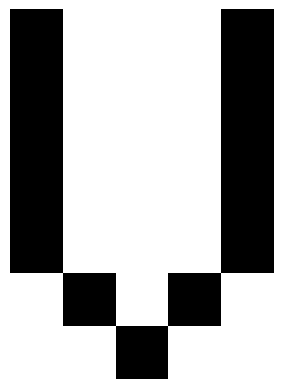

23


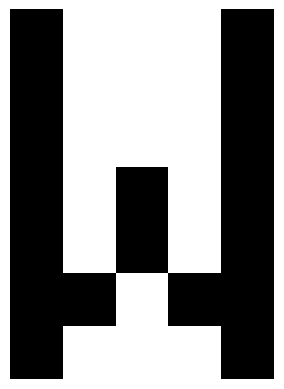

24


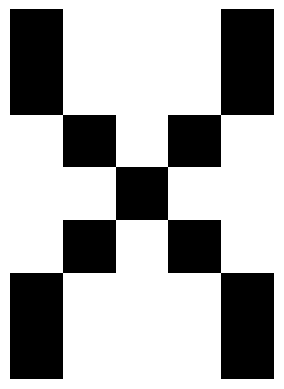

25


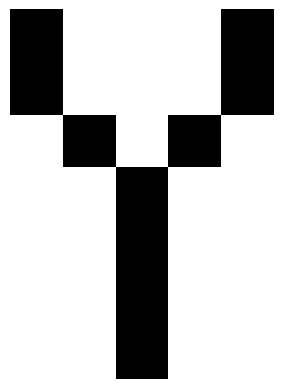

26


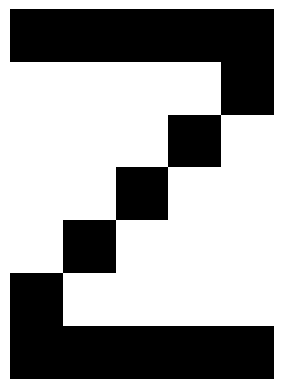

27


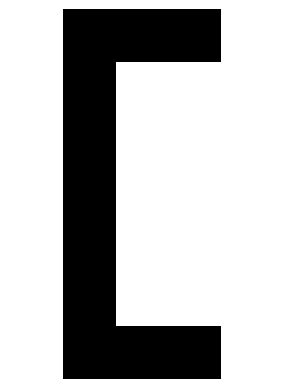

28


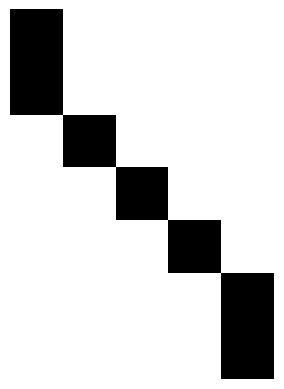

29


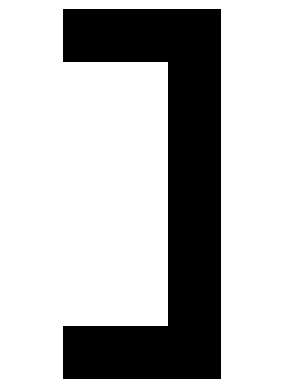

30


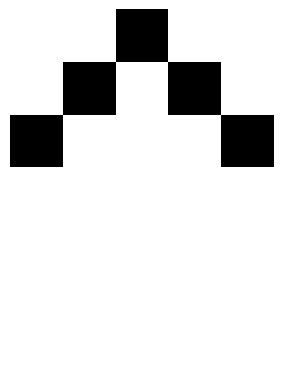

31


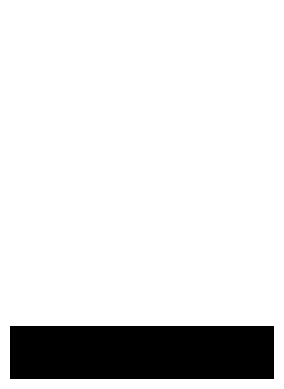

In [ ]:
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense

# Creamos el decodificador desde la capa después de latente
entrada_latente = Input(shape=(2,))
x = autoencoder.layers[3](entrada_latente)  # Dense(16, 'gelu')
salida_generada = autoencoder.layers[4](x)  # Dense(35, 'sigmoid')

# Modelo decodificador
decodificador = Model(inputs=entrada_latente, outputs=salida_generada)

# Punto cualquiera en el espacio latente
punto = np.array([[36.3329, 6.40275]])
letra_generada = decodificador.predict(punto)

# Mostrar la letra generada
print("Letra generada:")
print(np.round(letra_generada.reshape(7, 5)))

# Visualizar como caracteres en 7x5
def mostrar_caracter(vector):
    matriz = vector.reshape((7, 5))
    plt.imshow(matriz, cmap='gray_r')
    plt.axis('off')
    plt.show()

# Mostrar los nuevos caracteres generados
for i, vec in enumerate(letra_generada):
    print(punto[i])
    mostrar_caracter(np.round(vec))

# Calcular las reconstrucciones para mostrarlas
reconstrucciones = autoencoder.predict(entradas)

# Mostrar todos los caracteres reconstruidos con sus coordenadas latentes
for i, vec in enumerate(reconstrucciones):
    print(i)
    mostrar_caracter(np.round(vec))

# Ejercicio 2

Sobre el mismo conjunto de datos, implementar una variante que funcione como un eliminador de
ruido.
* Plantear una arquitectura de red conveniente para esta tarea.
* Explicar la elección. Distorsionen las entradas en diferentes niveles y estudien la capacidad
del auto codificador de eliminar el ruido.


In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
import numpy as np

def agregar_ruido_binario(datos, nivel=0.1):
    datos_r = datos.copy()
    ruido = np.random.rand(*datos.shape) < nivel
    datos_r = np.where(ruido, 1 - datos_r, datos_r)
    return datos_r

# Modelo secuencial del autoencoder
entrada = Input(shape=(35,))
x = Dense(16, activation='gelu')(entrada) # Capa codificadora
latente = Dense(2, activation='linear', name='latente')(x) # Capa latente
x = Dense(16, activation='gelu')(latente)
salida = Dense(35, activation='sigmoid', name='salida')(x) # Capa decodificadora

# Modelo autoencoder
autoencoder = Model(inputs=entrada, outputs=salida)

# Compilación del modelo
opt = keras.optimizers.Adam(learning_rate=0.05)
autoencoder.compile(loss='binary_crossentropy', optimizer=opt)

np.random.seed(42)
entradas_con_ruido = agregar_ruido_binario(entradas, nivel=0.1)

# Entrenamiento
historia = autoencoder.fit(x=entradas_con_ruido, y=entradas, epochs=600)

Epoch 1/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6953
Epoch 2/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.6911
Epoch 3/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6305
Epoch 4/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6074
Epoch 5/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5951
Epoch 6/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5749
Epoch 7/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.5637
Epoch 8/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5488
Epoch 9/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5390
Epoch 10/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5235
Epoch 11/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5163
Epoch 12/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5008
Epoch 13/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4867
Epoch 14/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4734
Epoch 15/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4547
Epoch 16/600
1/1 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


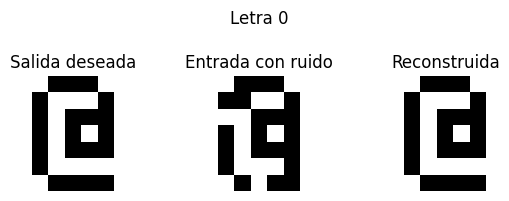

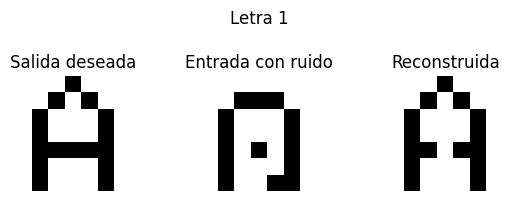

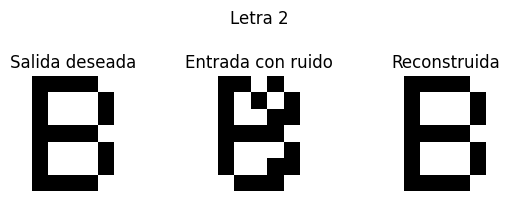

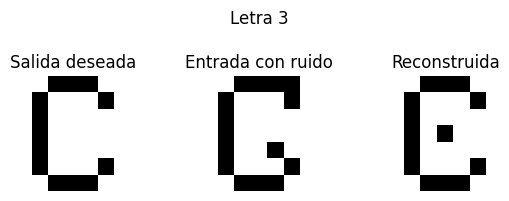

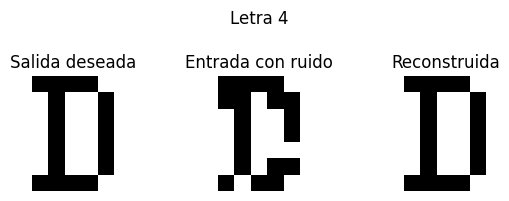

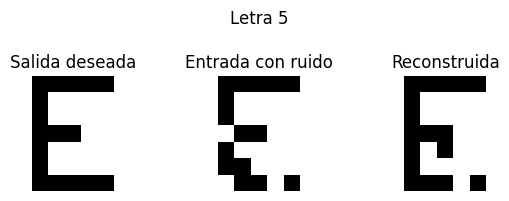

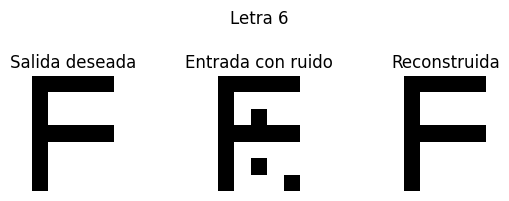

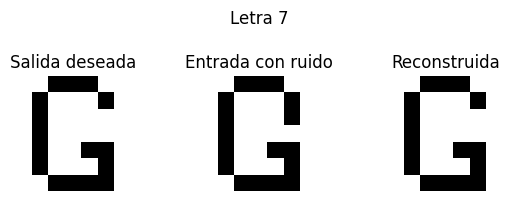

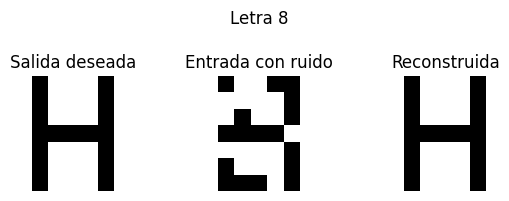

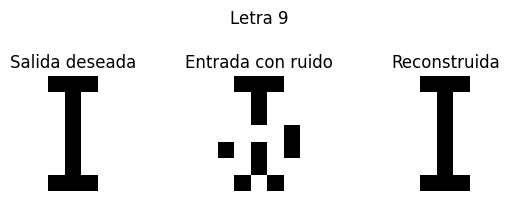

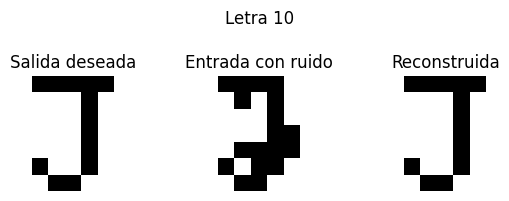

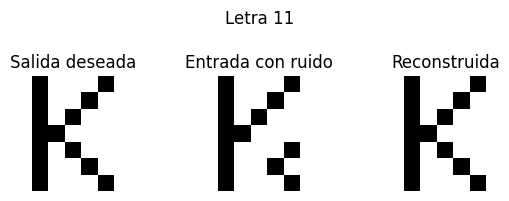

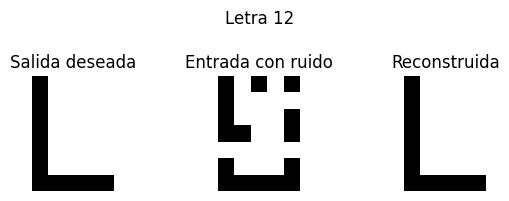

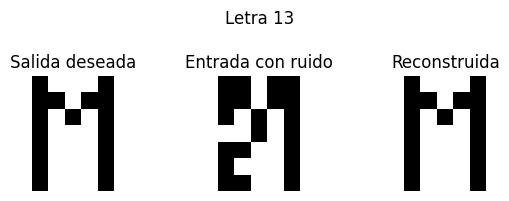

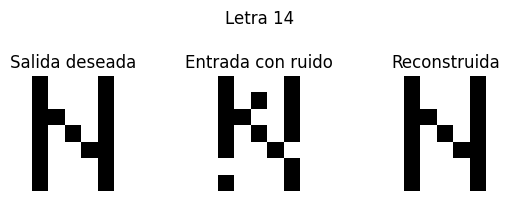

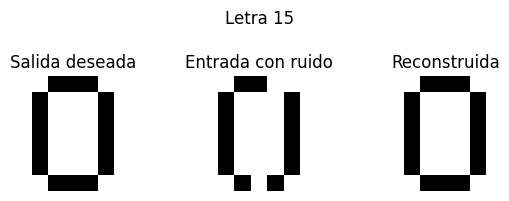

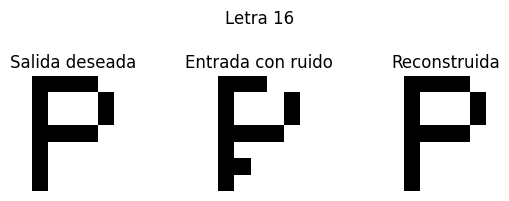

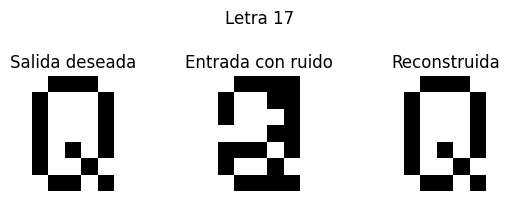

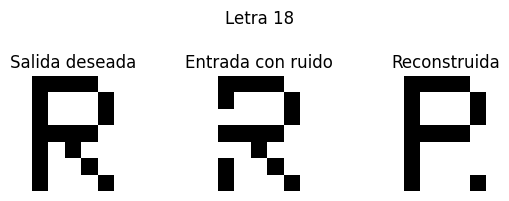

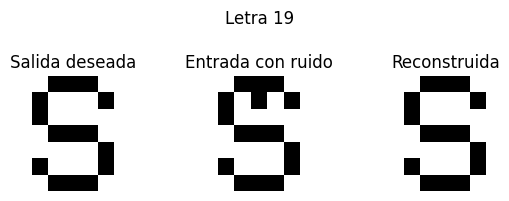

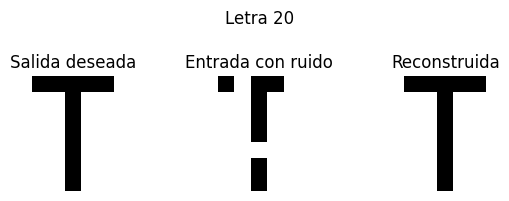

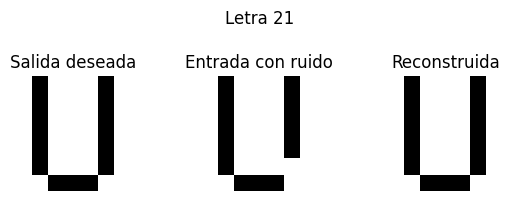

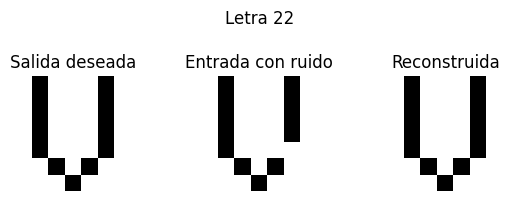

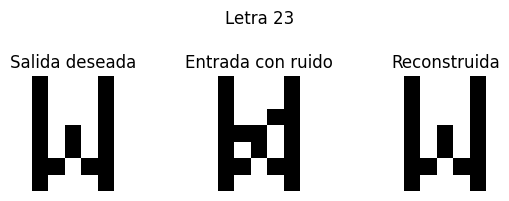

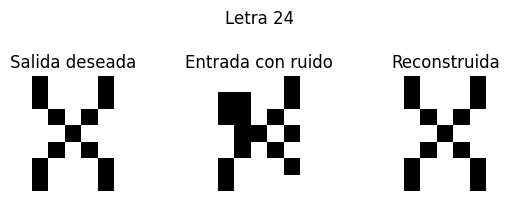

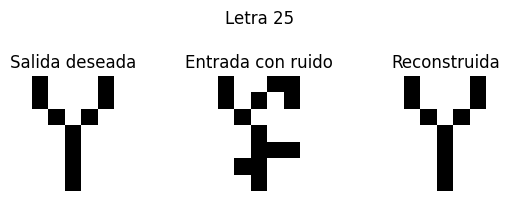

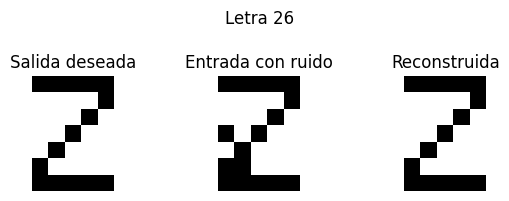

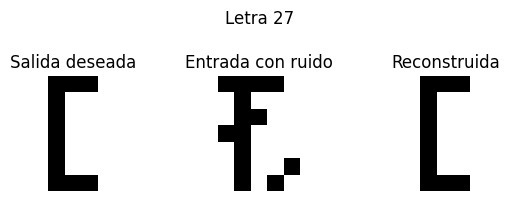

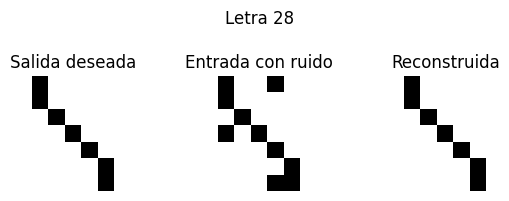

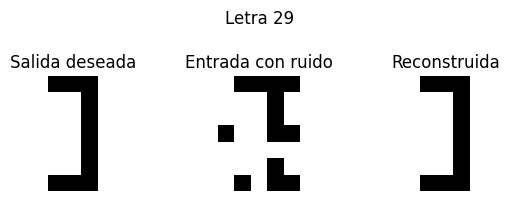

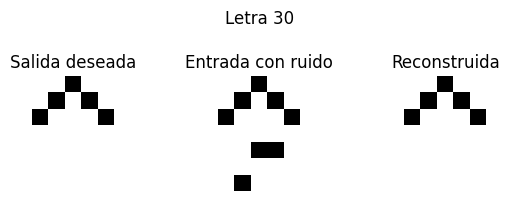

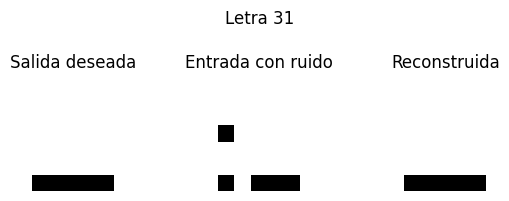

Bits bien reconstruidos: 1114/1120 (99.46%)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

reconstrucciones = autoencoder.predict(entradas_con_ruido)

# Función para mostrar un vector de 35 bits como una imagen 7x5
def mostrar_letra(vector, titulo, subplot):
    matriz = vector.reshape((7, 5))
    subplot.imshow(matriz, cmap='gray_r')
    subplot.set_title(titulo)
    subplot.axis('off')

# Visualizar todas las letras
for i in range(len(entradas)):
    fig, axs = plt.subplots(1, 3, figsize=(6, 2))

    mostrar_letra(entradas[i], "Salida deseada", axs[0])
    mostrar_letra(entradas_con_ruido[i], "Entrada con ruido", axs[1])
    mostrar_letra(np.round(reconstrucciones[i]), "Reconstruida", axs[2])

    plt.suptitle(f"Letra {i}")
    plt.tight_layout()
    plt.show()

reconstruidas_binarias = np.round(reconstrucciones)
bits_totales = np.prod(entradas.shape)
bits_correctos = np.sum(reconstruidas_binarias == entradas)
print(f"Bits bien reconstruidos: {bits_correctos}/{bits_totales} ({100 * bits_correctos / bits_totales:.2f}%)")

# Ejercicio 3

Plantear y resolver con un auto codificador un escenario donde puedan generar nuevas muestras
para un problema que ustedes elijan.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

entradas1 = np.array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], # Negra
                      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], # Blanca
                      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
                       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
                       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0], # Corchea
                      [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
                       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
                       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
                       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0], # Semicorchea
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
                       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
                       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
                       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
                       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
                       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
                       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
                       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
                       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
                       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
                       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Corchea Triple
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
                       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
                       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
                       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
                       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
                       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
                       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
                       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
                       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
                       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
                       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Semicorchea Triple
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
                       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
                       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
                       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
                       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
                       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
                       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
                       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
                       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
                       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
                       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Fusa Triple
                      [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
                       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
                       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
                       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # Corchea Doble
                      [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
                       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
                       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
                       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # Semicorchea Doble
                      [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
                       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
                       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
                       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # Fusa Doble
                      [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
                       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
                       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
                       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

salida_obtenida1 = entradas1.copy()

In [ ]:
import keras
from keras.models import Model
from keras.layers import Dense, Input
import numpy as np

# Modelo secuencial del autoencoder
entrada = Input(shape=(132,))
x = Dense(66, activation='gelu')(entrada)  # Capa codificadora
latente = Dense(2, activation='linear', name='latente')(x) # Capa latente
x = Dense(66, activation='gelu')(latente)
salida = Dense(132, activation='sigmoid', name='salida')(x)  # Capa decodificadora

# Modelo autoencoder
autoencoder = Model(inputs=entrada, outputs=salida)

# Compilación del modelo
opt = keras.optimizers.Adam(learning_rate=0.05)
autoencoder.compile(loss='binary_crossentropy', optimizer=opt)

# Entrenamiento
historia = autoencoder.fit(entradas1, salida_obtenida1, epochs=200)

# Predicciones
predicciones = autoencoder.predict(entradas1)

# Mostrar original vs reconstruido
for i in range(len(entradas1)):
    print(f"Letra {i}:")
    print("Original:    ", entradas1[i])
    print("Reconstruida:", np.round(predicciones[i]))
    print()

pred_binarias = np.round(autoencoder.predict(entradas1))
errores = np.sum(pred_binarias != entradas1)
total = entradas1.size
print(f"Bits mal reconstruidos: {errores}/{total} ({errores / total * 100:.2f}%)")

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6941
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.7517
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4831
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4271
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3928
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3997
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3732
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3705
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3567
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3386
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3135
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2785
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2381
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2083
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1812
Epoch 16/200
1/1 ━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


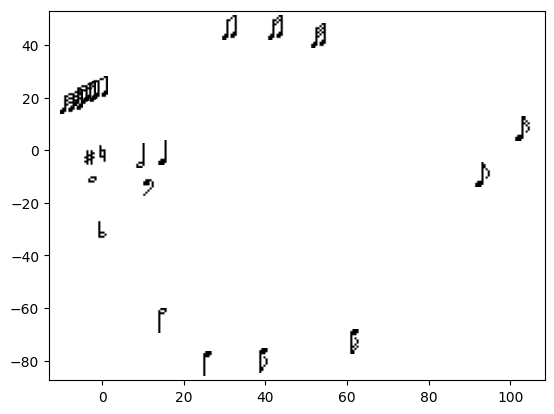

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Modelo para obtener coordenadas latentes
capa_latente = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('latente').output)
coordenadas_latentes = capa_latente.predict(entradas1)

ruta_base = "/content/drive/MyDrive/Redes Neuronales/notas_musicales/"
imagenes = [f"{ruta_base}nota{i}.png" for i in range(1, 20)]

fig, ax = plt.subplots()
ax.scatter(coordenadas_latentes[:, 0], coordenadas_latentes[:, 1], s=0)

for i, ruta in enumerate(imagenes[:len(coordenadas_latentes)]):
    img = mpimg.imread(ruta)
    imagebox = OffsetImage(img, zoom=1.5)
    ab = AnnotationBbox(imagebox, (coordenadas_latentes[i, 0], coordenadas_latentes[i, 1]),
                        frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Simbolo generada:
[[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]]
simbolo generado desde punto latente [10 10]


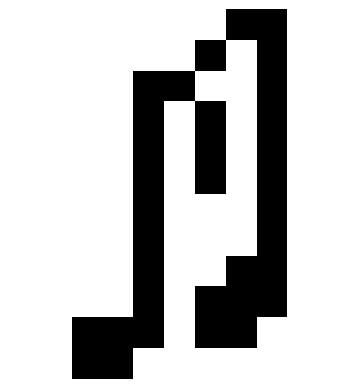

Simbolo /content/drive/MyDrive/Redes Neuronales/notas_musicales/nota1.png: Coordenadas latentes -> x: 15.1212, y: -0.7842
Simbolo /content/drive/MyDrive/Redes Neuronales/notas_musicales/nota2.png: Coordenadas latentes -> x: 9.6200, y: -1.9124
Simbolo /content/drive/MyDrive/Redes Neuronales/notas_musicales/nota3.png: Coordenadas latentes -> x: 93.2055, y: -9.2284
Simbolo /content/drive/MyDrive/Redes Neuronales/notas_musicales/nota4.png: Coordenadas latentes -> x: 102.9872, y: 8.3895
Simbolo /content/drive/MyDrive/Redes Neuronales/notas_musicales/nota5.png: Coordenadas latentes -> x: -1.4933, y: 23.4037
Simbolo /content/drive/MyDrive/Redes Neuronales/notas_musicales/nota6.png: Coordenadas latentes -> x: -4.4464, y: 21.4702
Simbolo /content/drive/MyDrive/Redes Neuronales/notas_musicales/nota7.png: Coordenadas latentes -> x: -7.5199, y: 18.3584
Simbolo /content/drive/MyDrive/Redes Neuronales/notas_musicales/nota8.png: Coordenadas latentes -> x: 31.2176, y: 46.6027
Simbolo /content/drive/My

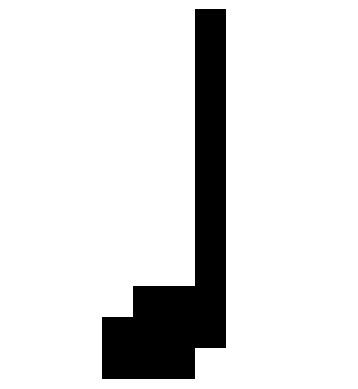

Simbolo 1: Coordenadas latentes -> x: 9.6200, y: -1.9124


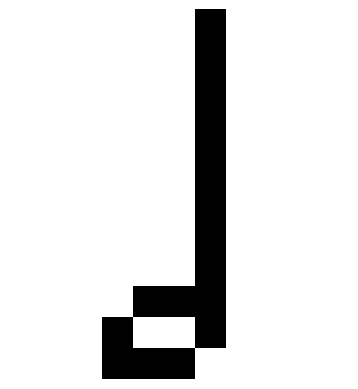

Simbolo 2: Coordenadas latentes -> x: 93.2055, y: -9.2284


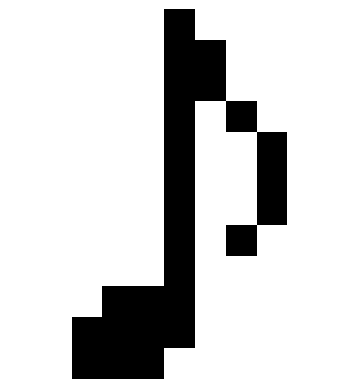

Simbolo 3: Coordenadas latentes -> x: 102.9872, y: 8.3895


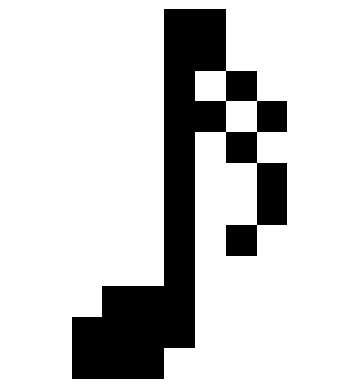

Simbolo 4: Coordenadas latentes -> x: -1.4933, y: 23.4037


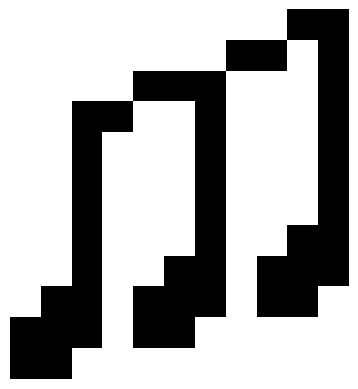

Simbolo 5: Coordenadas latentes -> x: -4.4464, y: 21.4702


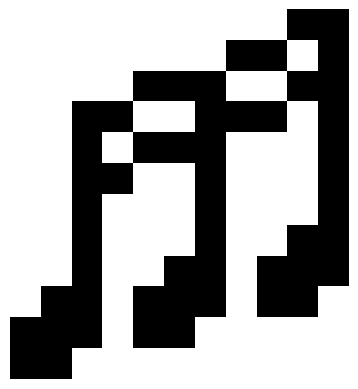

Simbolo 6: Coordenadas latentes -> x: -7.5199, y: 18.3584


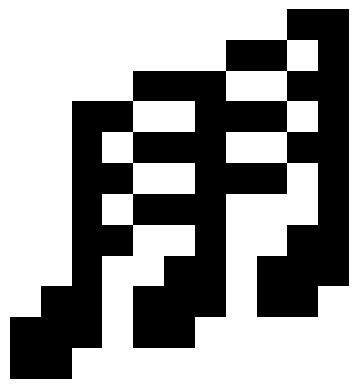

Simbolo 7: Coordenadas latentes -> x: 31.2176, y: 46.6027


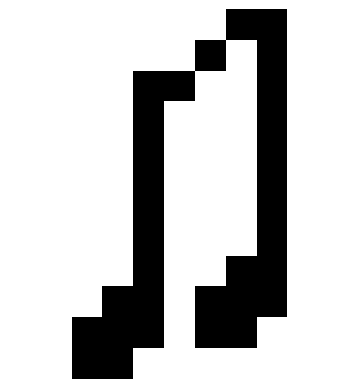

Simbolo 8: Coordenadas latentes -> x: 42.5826, y: 46.4929


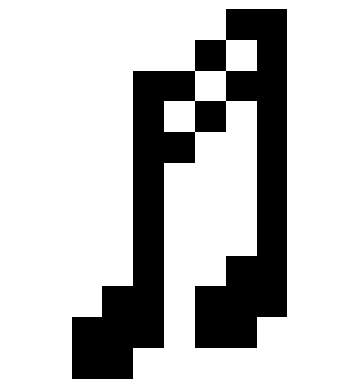

Simbolo 9: Coordenadas latentes -> x: 52.9740, y: 43.6614


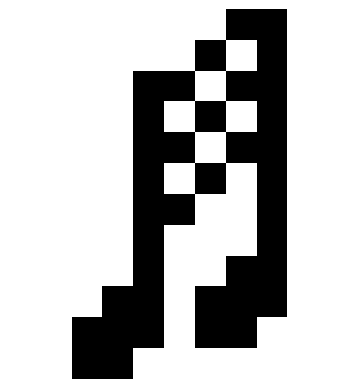

Simbolo 10: Coordenadas latentes -> x: 26.0170, y: -81.0486


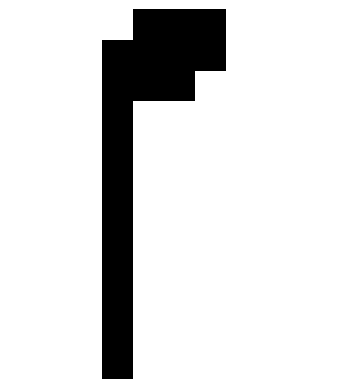

Simbolo 11: Coordenadas latentes -> x: 15.0949, y: -64.8919


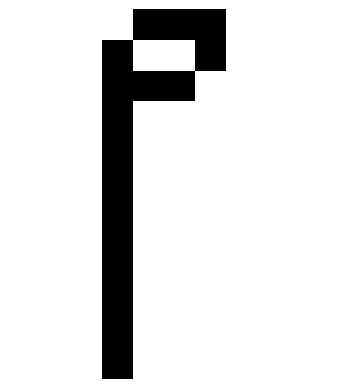

Simbolo 12: Coordenadas latentes -> x: 39.8356, y: -79.9748


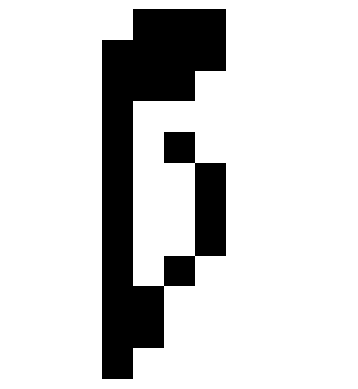

Simbolo 13: Coordenadas latentes -> x: 61.9856, y: -72.6947


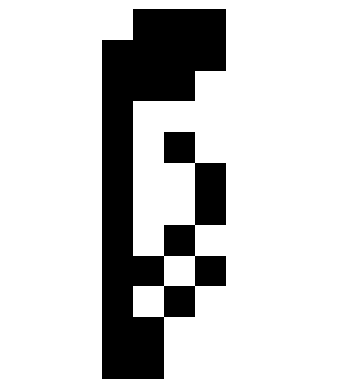

Simbolo 14: Coordenadas latentes -> x: -2.1393, y: -11.4533


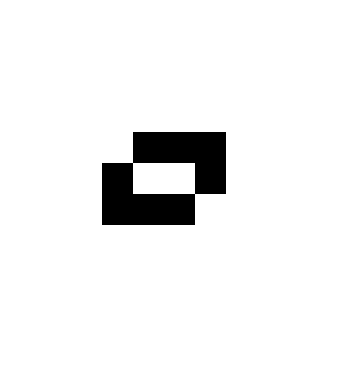

Simbolo 15: Coordenadas latentes -> x: 11.4467, y: -14.2149


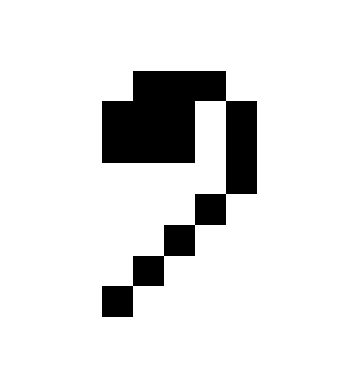

Simbolo 16: Coordenadas latentes -> x: -0.0193, y: -1.4428


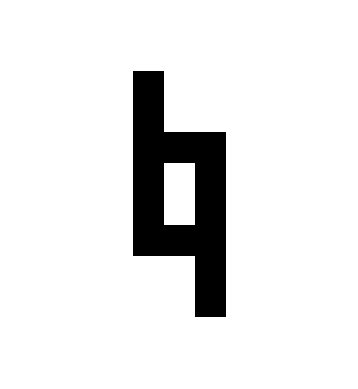

Simbolo 17: Coordenadas latentes -> x: -3.1789, y: -3.1646


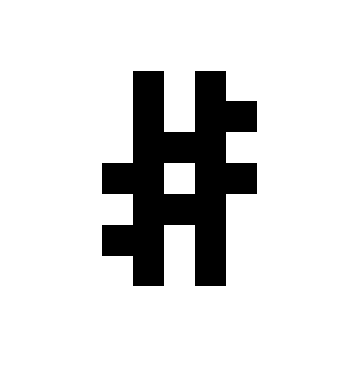

Simbolo 18: Coordenadas latentes -> x: 0.3951, y: -30.0405


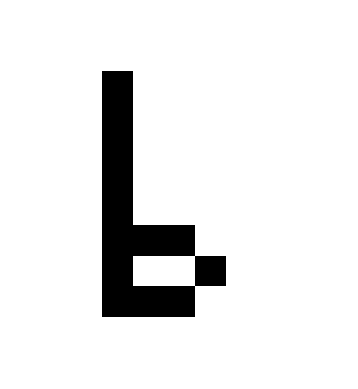

In [ ]:
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense

# --- Paso 1: Extraer la capa latente y decodificadora ---
# Crear manualmente el decodificador: desde la capa después de 'latente'
entrada_latente = Input(shape=(2,))
x = autoencoder.layers[3](entrada_latente)  # Dense(26, 'gelu')
salida_generada = autoencoder.layers[4](x)  # Dense(56, 'sigmoid')

# Modelo decodificador
decodificador = Model(inputs=entrada_latente, outputs=salida_generada)

# --- Paso 2: Crear nuevos puntos en el espacio latente ---
# Punto arbitrario en el espacio latente
punto = np.array([[10, 10]])
letra_generada = decodificador.predict(punto)

# Mostrar la letra generada (si son letras 7x5)
print("Simbolo generada:")
print(np.round(letra_generada.reshape(12, 11)))

# --- Paso 4: Visualización como caracteres en 5x7 (si los datos son tipo letra) ---
def mostrar_caracter(vector):
    matriz = vector.reshape((12, 11))  # Ajustar según cómo representes las letras (7x5)
    plt.imshow(matriz, cmap='gray_r')
    plt.axis('off')
    plt.show()

# Mostrar los nuevos caracteres generados
for i, vec in enumerate(letra_generada):
    print(f"simbolo generado desde punto latente {punto[i]}")
    mostrar_caracter(np.round(vec))

for i in range(len(coordenadas_latentes)):
    x, y = coordenadas_latentes[i]
    print(f"Simbolo {imagenes[i]}: Coordenadas latentes -> x: {x:.4f}, y: {y:.4f}")

# Calcular las reconstrucciones para mostrarlas
reconstrucciones = autoencoder.predict(entradas1)

# Paso 4: Mostrar todos los caracteres reconstruidos con sus coordenadas latentes
for i, vec in enumerate(reconstrucciones):
    print(f"Simbolo {i}: Coordenadas latentes -> x: {coordenadas_latentes[i][0]:.4f}, y: {coordenadas_latentes[i][1]:.4f}")
    mostrar_caracter(np.round(vec))

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
import numpy as np

def agregar_ruido_binario(entradas, nivel=0.1):
    entradas_r = entradas.copy()
    ruido = np.random.rand(*entradas.shape) < nivel
    entradas_r = np.where(ruido, 1 - entradas_r, entradas_r)
    return entradas_r

# Modelo secuencial del autoencoder
entrada = Input(shape=(132,))
x = Dense(66, activation='gelu')(entrada) # Capa codificadora
latente = Dense(2, activation='linear', name='latente')(x) # Capa latente
x = Dense(66, activation='gelu')(latente)
salida = Dense(132, activation='sigmoid', name='salida')(x) # Capa decodificadora

# Modelo autoencoder
autoencoder = Model(inputs=entrada, outputs=salida)

# Compilación del modelo
opt = keras.optimizers.Adam(learning_rate=0.05)
autoencoder.compile(loss='binary_crossentropy', optimizer=opt)

np.random.seed(42)
entradas1_con_ruido = agregar_ruido_binario(entradas1, nivel=0.1)

# Entrenamiento
historia = autoencoder.fit(x=entradas1_con_ruido, y=entradas1, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6935
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.7199
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.5336
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4135
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3700
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3308
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.2848
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2471
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.2328
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2245
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2168
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.1990
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.1866
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1811
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1762
Epoch 16/200
1/1 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


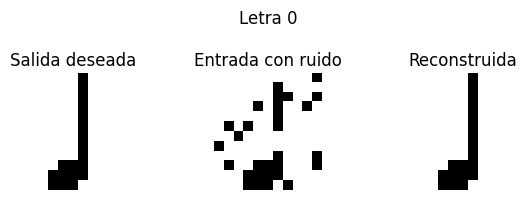

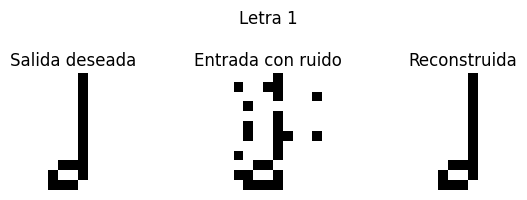

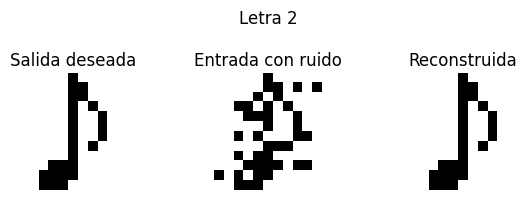

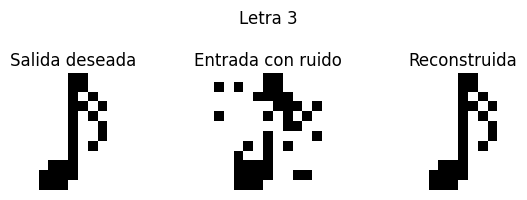

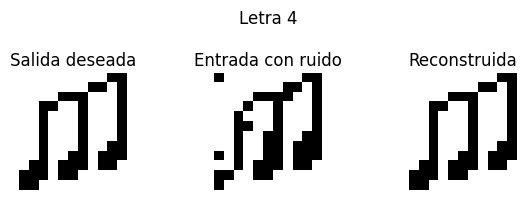

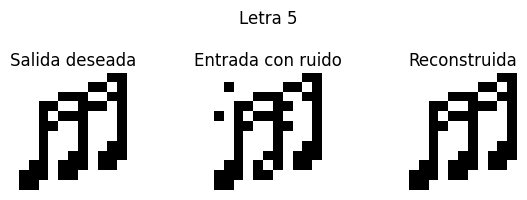

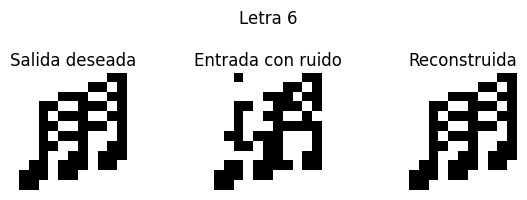

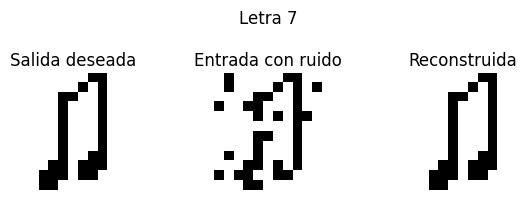

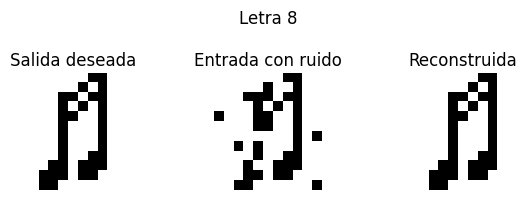

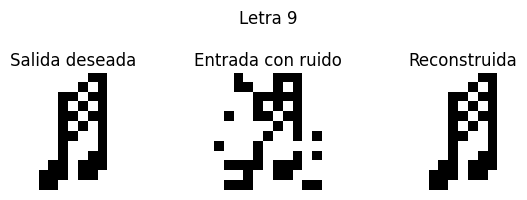

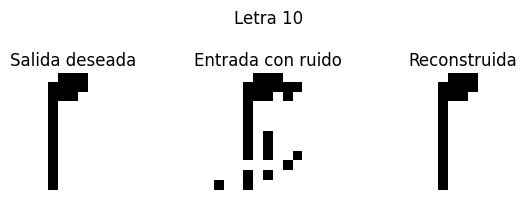

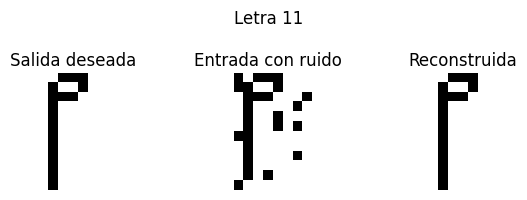

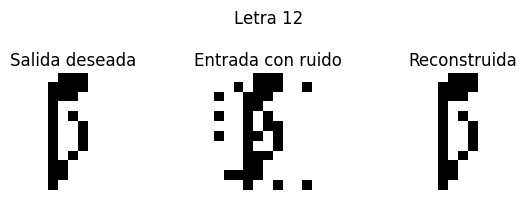

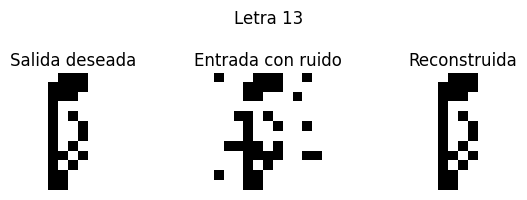

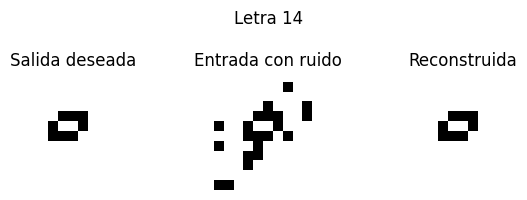

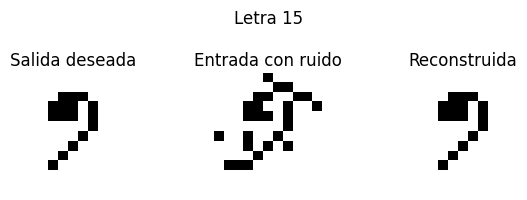

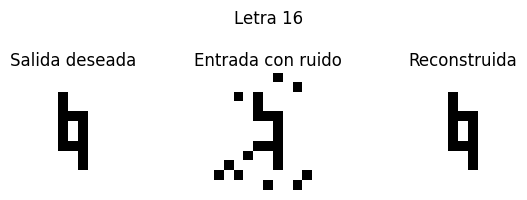

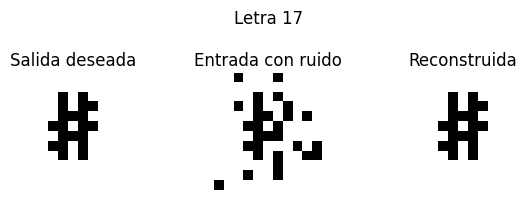

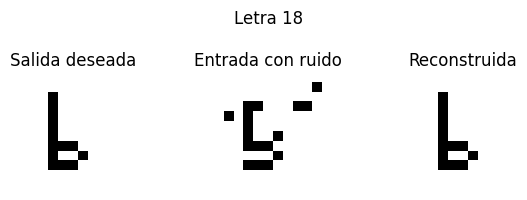

Bits bien reconstruidos: 2508/2508 (100.00%)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

reconstrucciones1 = autoencoder.predict(entradas1_con_ruido)

# Función para mostrar un vector de 35 bits como una imagen 5x7
def mostrar_letra(vector, titulo, subplot):
    matriz = vector.reshape((12, 11))
    subplot.imshow(matriz, cmap='gray_r')
    subplot.set_title(titulo)
    subplot.axis('off')

# Suponemos que:
# - entradas: letras originales
# - entradas_con_ruido: letras con ruido agregado
# - salidas_predichas: reconstrucción del autoencoder

# Visualizar todas las letras
for i in range(len(entradas1)):
    fig, axs = plt.subplots(1, 3, figsize=(6, 2))

    mostrar_letra(entradas1[i], "Salida deseada", axs[0])
    mostrar_letra(entradas1_con_ruido[i], "Entrada con ruido", axs[1])
    mostrar_letra(np.round(reconstrucciones1[i]), "Reconstruida", axs[2])

    plt.suptitle(f"Letra {i}")
    plt.tight_layout()
    plt.show()

reconstruidas_binarias = np.round(reconstrucciones1)
bits_totales = np.prod(entradas1.shape)
bits_correctos = np.sum(reconstruidas_binarias == entradas1)
print(f"Bits bien reconstruidos: {bits_correctos}/{bits_totales} ({100 * bits_correctos / bits_totales:.2f}%)")